# Sync-ML-Intern Task 3: Boston Housing Price Prediction Project
***Author: Ahmed Hisham Fathy Hassabou***
## Project Overview

This Jupyter Notebook provides an end-to-end implementation of a machine learning project aimed at predicting housing prices in the Boston area. The project uses the popular Boston Housing dataset and follows a structured workflow to achieve the following objectives:

1. Load and Prepare the Dataset: The project starts by importing essential libraries and loading the Boston Housing dataset. The dataset includes features related to housing and the corresponding target variable, which is the price of houses.

2. Data Splitting: The data is divided into training and testing sets. The training set is used for model training, while the testing set is reserved for model evaluation.

3. Model Building: A Decision Tree Regressor model is employed to predict housing prices. This machine learning algorithm is suitable for regression tasks and will be fine-tuned for optimal performance.

4. Cross-Validation: Cross-validation is performed to assess the model's performance, providing a robust way to measure its predictive accuracy.

5. Hyperparameter Tuning: Grid search is used to find the best hyperparameters for the Decision Tree Regressor. Hyperparameters can significantly impact the model's behavior, and this process aims to optimize its performance.

6. Model Visualization: The project includes data visualization using pair plots to examine the relationships between features and the target variable.

7. Residual Analysis: Residuals, the differences between actual and predicted values, are visualized to understand how well the model fits the data.

8. Price Prediction: The trained model is used to make predictions for a test house's features, demonstrating how the model can be applied to real-world scenarios.

This Jupyter Notebook serves as a comprehensive guide to building, evaluating, and optimizing a machine learning model for housing price prediction. The inclusion of descriptions in text cells helps reader understand the purpose and flow of the project, while the code cells provide the actual implementation.

Feel free to run each code cell individually and explore the project to gain insights into the Boston Housing dataset and machine learning model development.


This cell imports the required libraries and loads the Boston Housing dataset. It prepares the dataset for further analysis and model building.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

The dataset is divided into a training set and a testing set. The training set is used for model training, and the testing set is used for evaluation.

In [2]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

This cell defines a Decision Tree Regressor and performs cross-validation to assess the model's performance.

In [3]:
# Define a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Perform Cross-Validation
scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print("Cross-Validation RMSE Scores:")
print(rmse_scores)

Cross-Validation RMSE Scores:
[4.98992813 6.13684481 6.08341197 6.58156798 4.68194671]


Grid search is used to find the best hyperparameters for the Decision Tree Regressor. These hyperparameters affect the model's behavior.


In [4]:
# Grid Search for Hyperparameter Tuning
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6}


The best hyperparameters obtained from the grid search are used to train the final Decision Tree Regressor model.


In [5]:
# Train the final model with the best hyperparameters
final_regressor = DecisionTreeRegressor(**best_params)
final_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=6)

The model is used to make predictions on the test set, and the Root Mean Squared Error (RMSE) is calculated to evaluate the model's performance.


In [6]:
# Make predictions on the test set
y_pred = final_regressor.predict(X_test)

# Calculate the test RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", test_rmse)

Test RMSE: 3.2678011365921606


Pair plots are created to visualize the relationships between features and the target variable in the dataset.


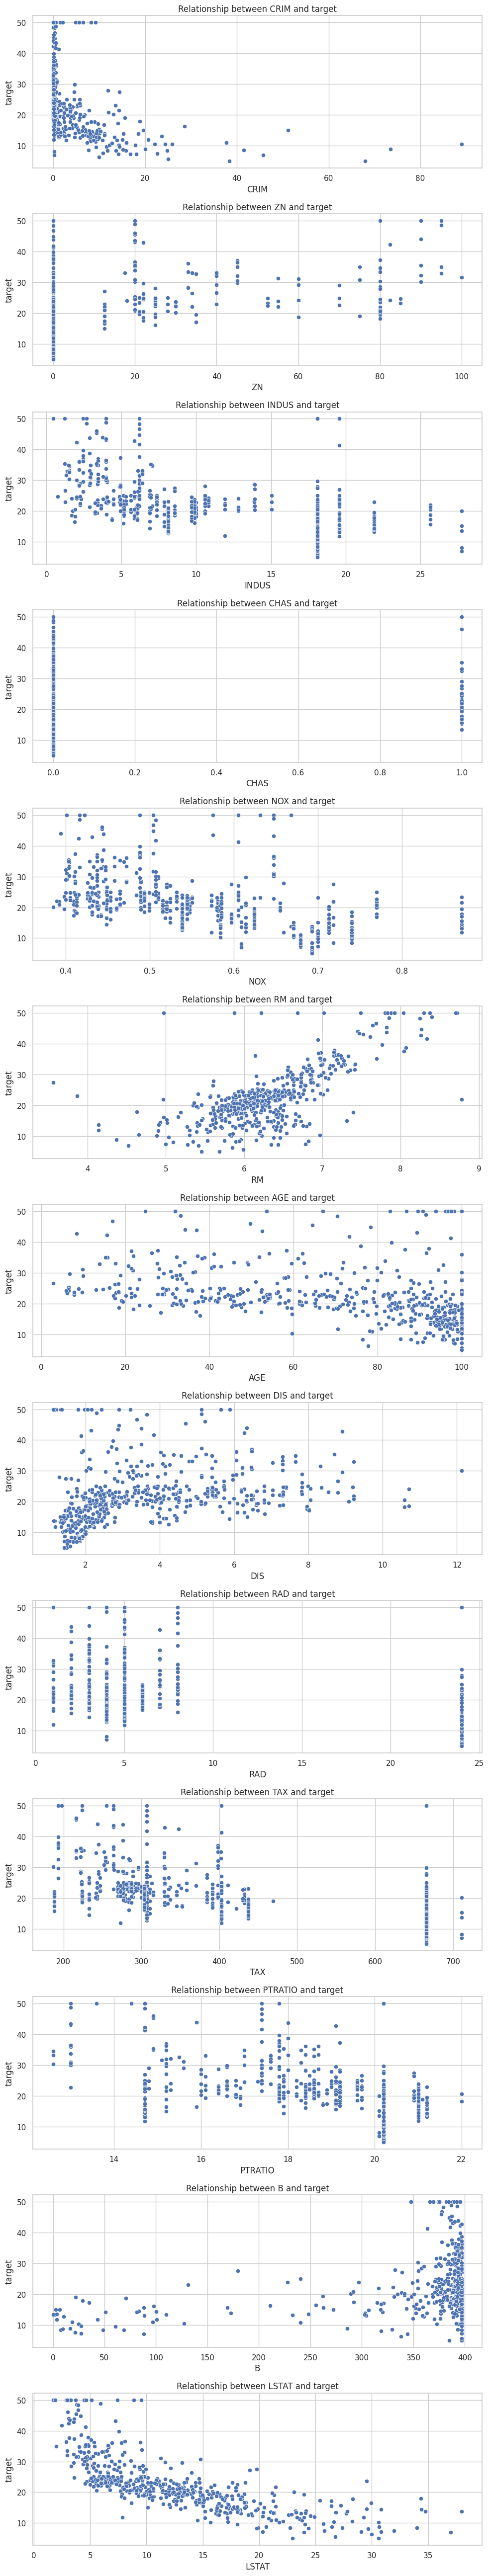

In [7]:
# Visualize the data using pair plots stacked vertically
sns.set(style="whitegrid")
data_df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
data_df['target'] = target

# Create individual pair plots stacked vertically
n_features = len(data_df.columns) - 1

# Define the number of rows and columns for subplots
n_rows = n_features
n_cols = 1

plt.figure(figsize=(10, 4 * n_features))  # Adjust the figure size as needed

for i, feature in enumerate(data_df.columns[:-1]):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=data_df[feature], y=data_df['target'])
    plt.title(f'Relationship between {feature} and target')

plt.tight_layout()
plt.show()


Residuals are visualized to understand how well the model fits the data.


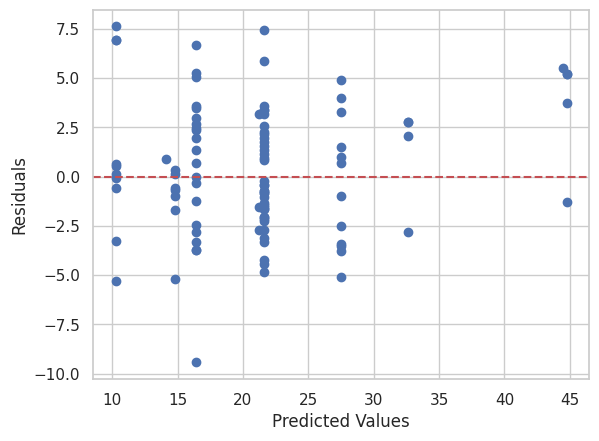

In [8]:
# Visualize the residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

A test house's features are defined, and the trained model is used to predict the house's price.

The test_house_features represent various attributes or characteristics of a house. Each element in the list corresponds to a specific feature or property of the house. Here's a brief description of what each feature represents:

1. CRIM: Crime rate (per capita) in the neighborhood.
2. ZN: Proportion of residential land zoned for large lots (over 25,000 sq. ft.).
3. INDUS: Proportion of non-retail business acres per town.
4. CHAS: A binary variable (0 or 1) indicating if the house is adjacent to the Charles River (1 if it is, 0 if it's not).
5. NOX: Nitrogen oxide concentration (parts per 10 million) in the air.
6. RM: Average number of rooms per dwelling.
7. AGE: Proportion of owner-occupied units built before 1940.
8. DIS: Weighted distance to employment centers.
9. RAD: Index of accessibility to radial highways.
10. TAX: Property tax rate (measured as tax per $10,000).
11. PTRATIO: Pupil-teacher ratio by town.
12. B: A measure of the proportion of residents of African American descent.
13. LSTAT: Percentage of lower status population in the neighborhood.

These features are used to predict the price of the house based on the historical data in the Boston Housing dataset. The provided list of test_house_features contains values for each of these features for a specific house, and the machine learning model predicts the house's price based on these feature values.


In [9]:
# Define the features for a test house
test_house_features = [11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]

# Use the trained model to make a price prediction for the test house
predicted_price = final_regressor.predict([test_house_features])

print("Predicted Price for the Test House:", predicted_price[0])

Predicted Price for the Test House: 21.632051282051282
